# forward pass

In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
image_path = '/root/data/blender_v2/training/occlusion_low_rez/collage_0.jpeg'
model_path = '/root/data/blender_v2/detection_free.h5'
coco_path = ''

In [3]:
# load retinanet model
model = models.load_model(model_path, convert=True, backbone_name='resnet50')
#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'fish'}

# display a bunch of images

In [14]:
import glob
import random

In [13]:
images = glob.glob('/root/data/blender_v2/training/occlusion_low_rez/*.jpeg')

In [41]:
def overlap(image, bboxes):
    # create numpy array of zeros
    overlap_matrix = np.zeros_like(image)
    for (i, bbox) in enumerate(bboxes[0]):
        b = np.array(bbox).astype(int)
        overlap_matrix[b[1]:b[3], b[0]:b[2]] += 1
    return overlap_matrix
        

In [42]:
image.shape

(751, 1333, 3)

('processing time: ', 0.08627796173095703)


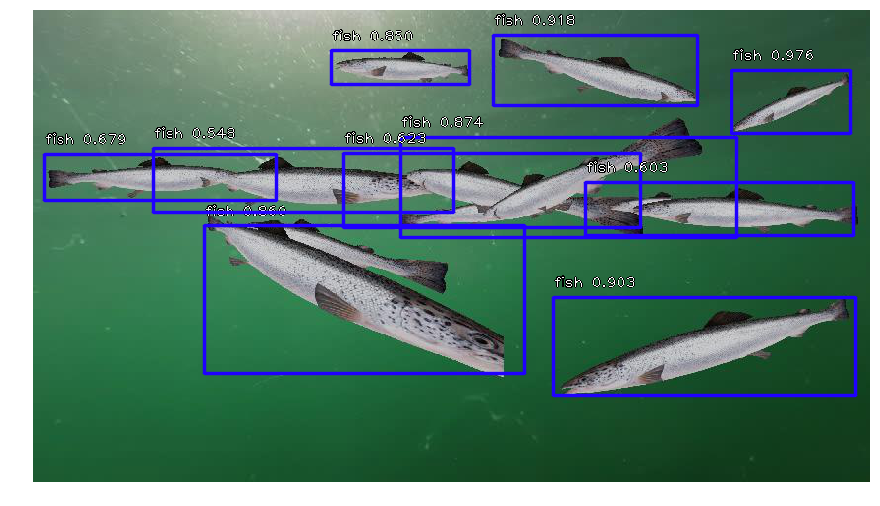

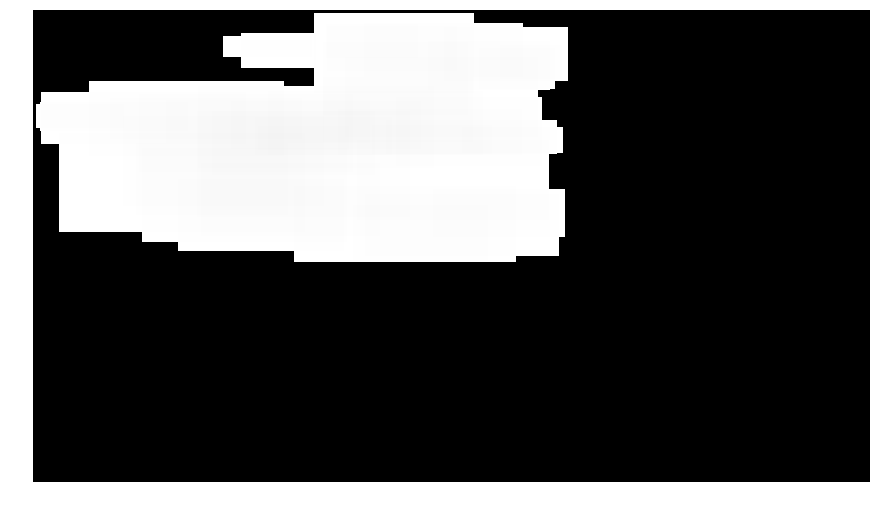

('processing time: ', 0.07447195053100586)


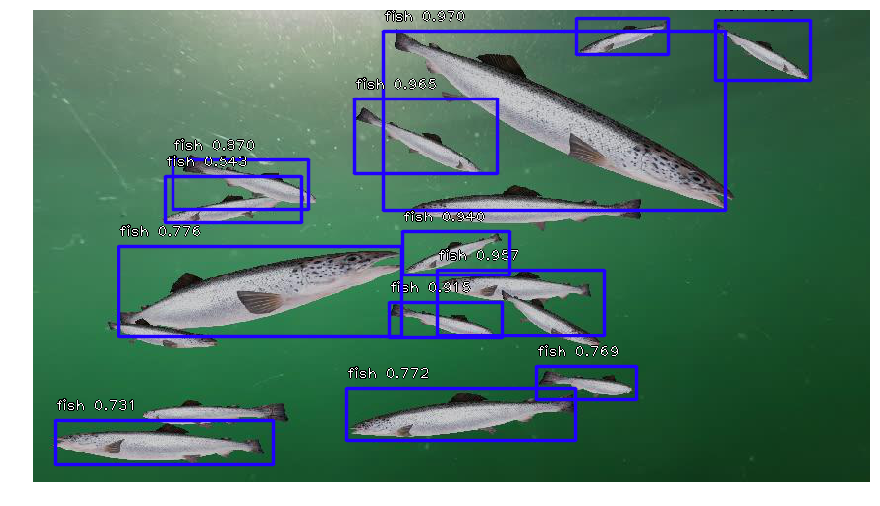

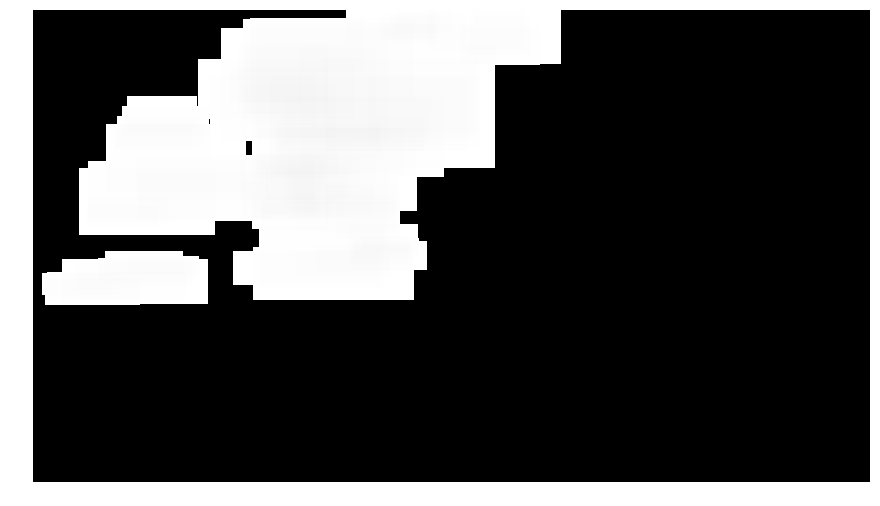

('processing time: ', 0.08077692985534668)


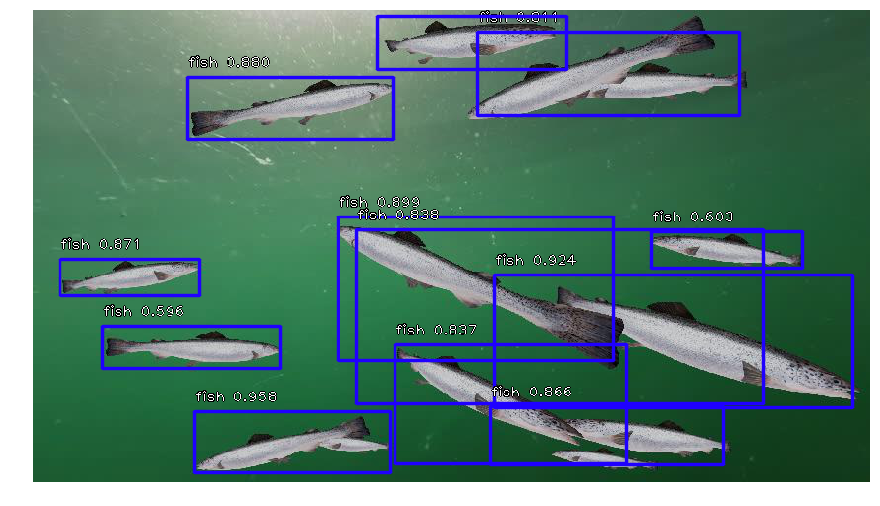

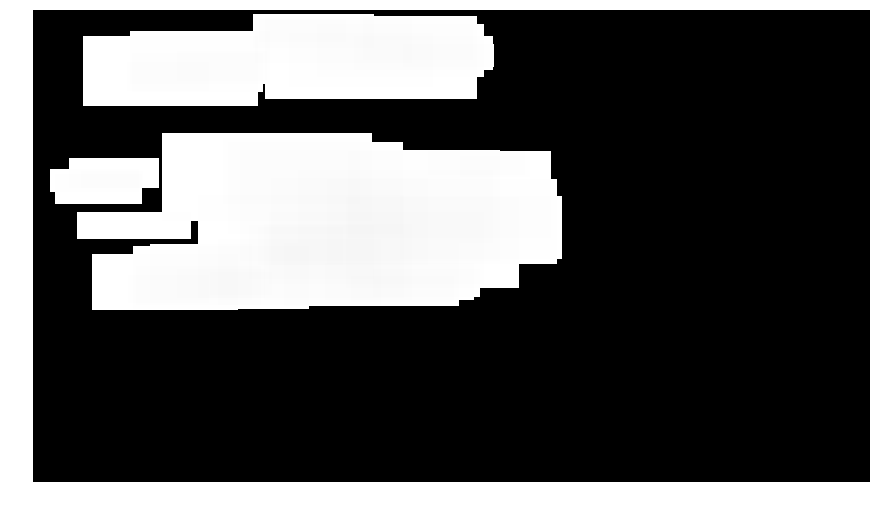

('processing time: ', 0.07642292976379395)


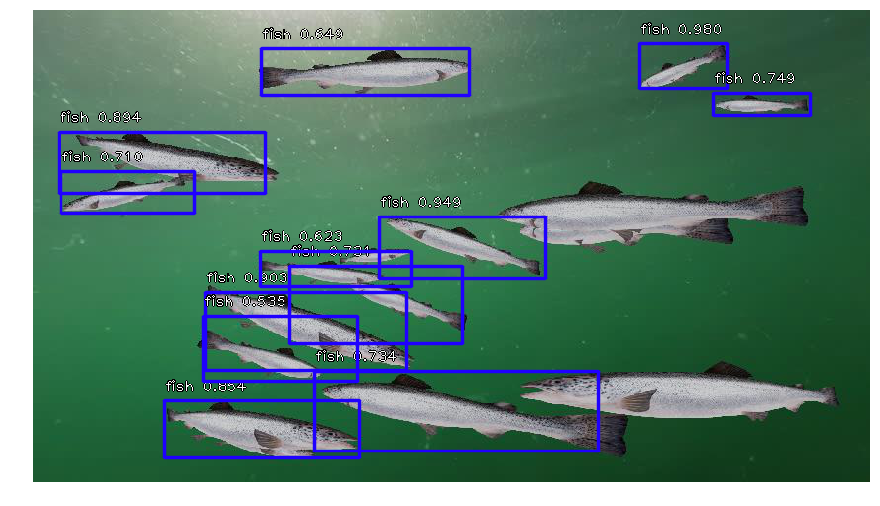

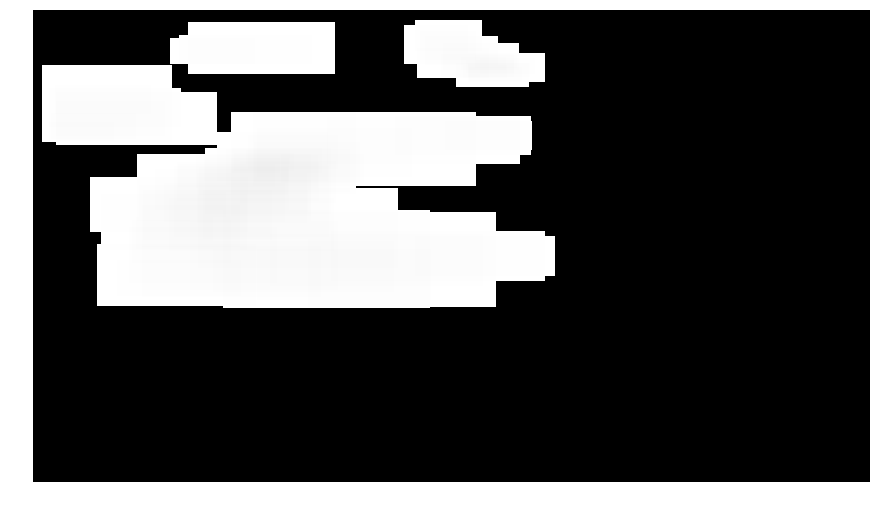

('processing time: ', 0.07712507247924805)


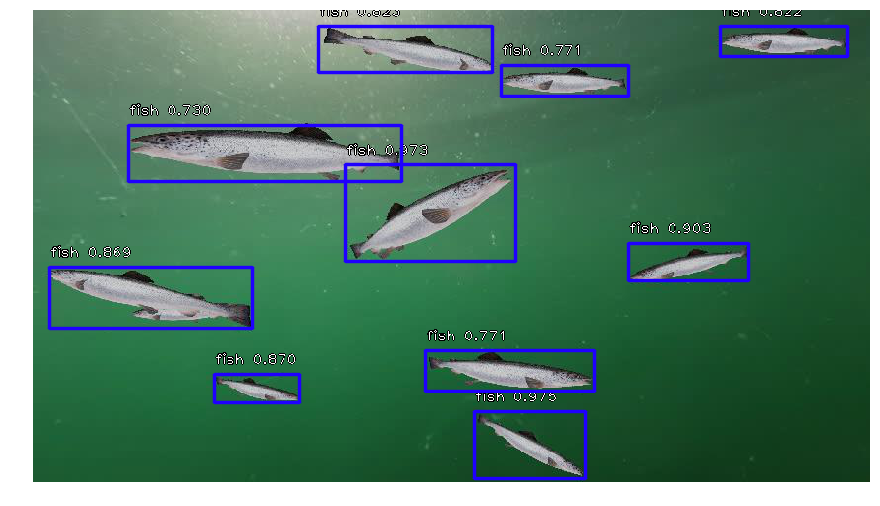

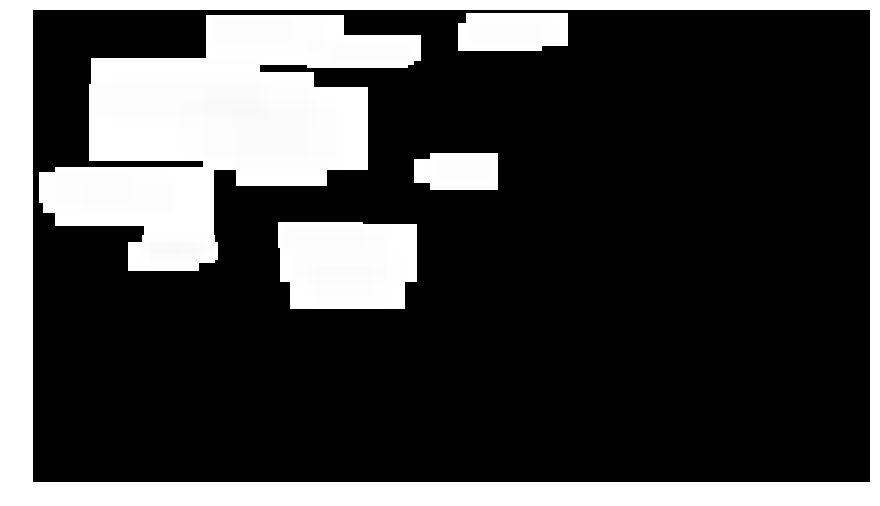

('processing time: ', 0.07851386070251465)


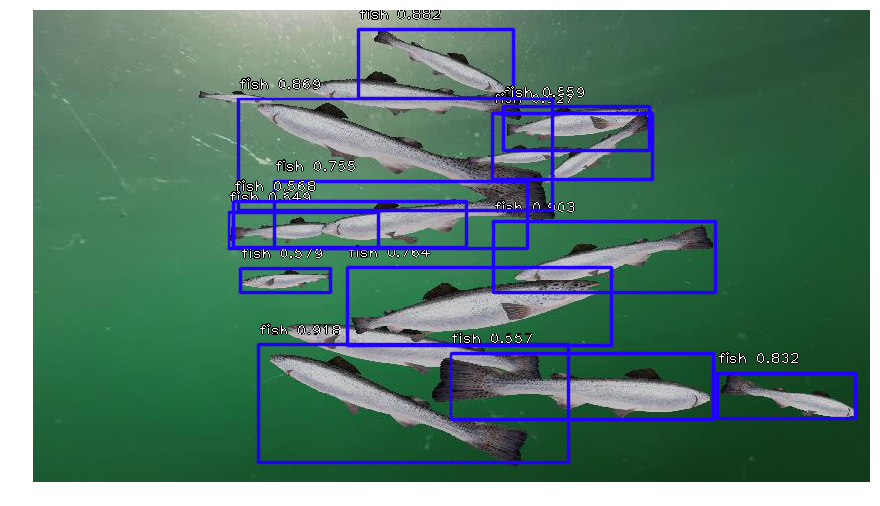

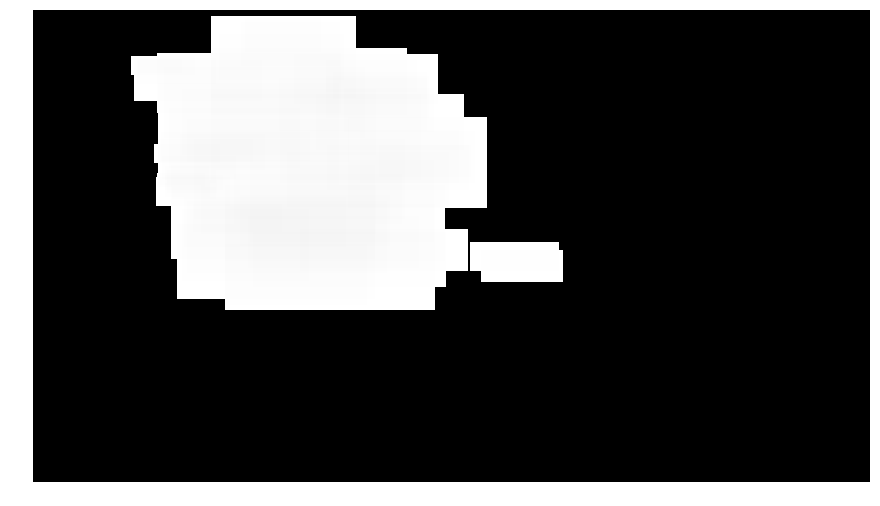

('processing time: ', 0.0741119384765625)


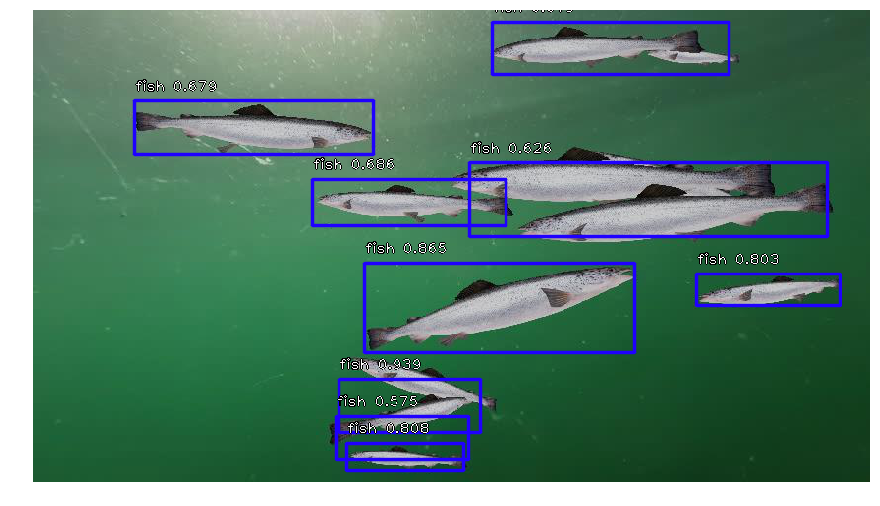

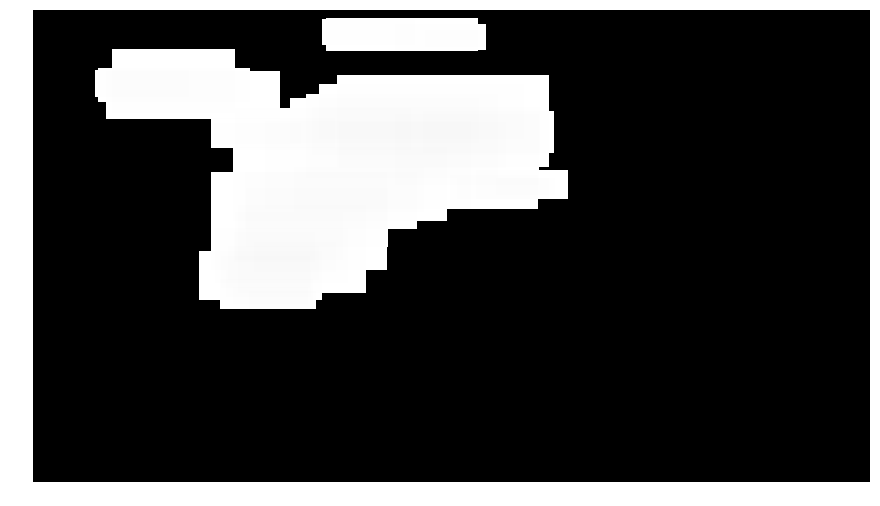

('processing time: ', 0.07804989814758301)


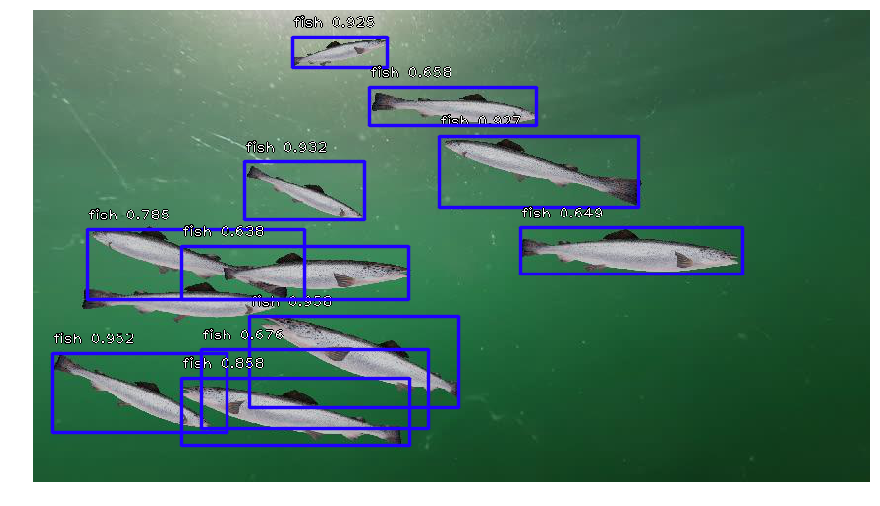

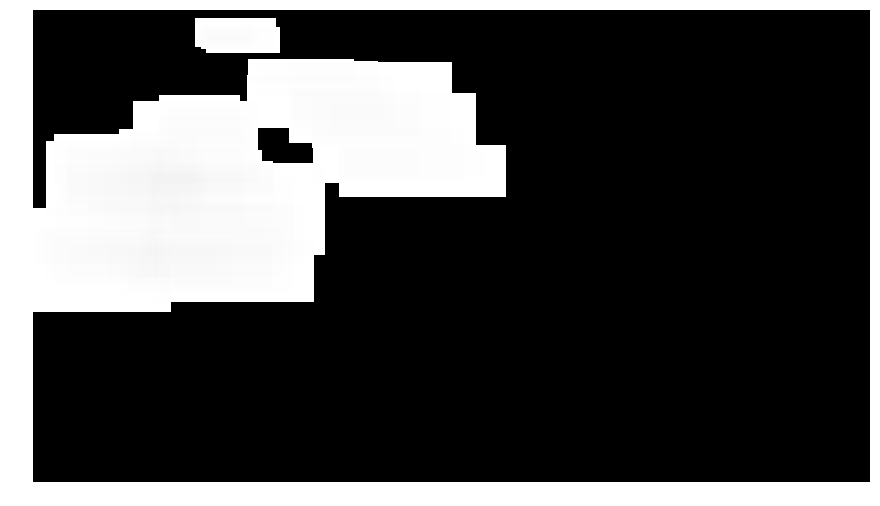

('processing time: ', 0.07749509811401367)


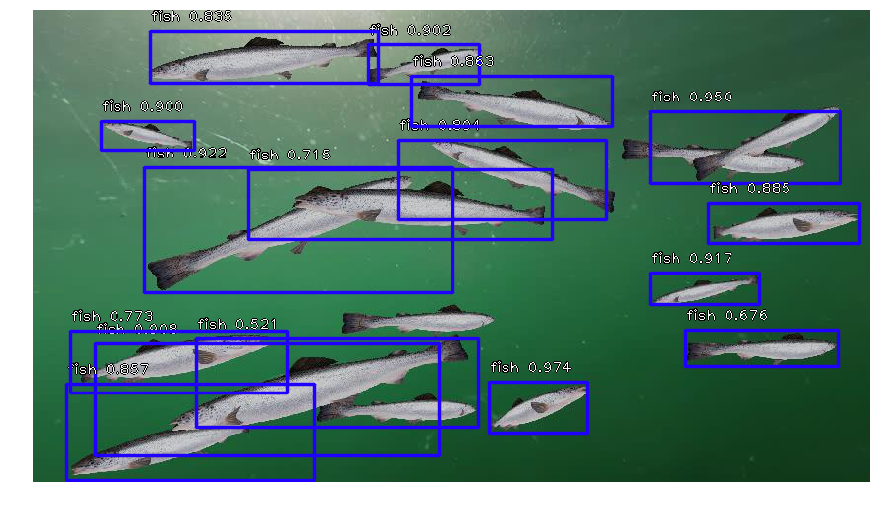

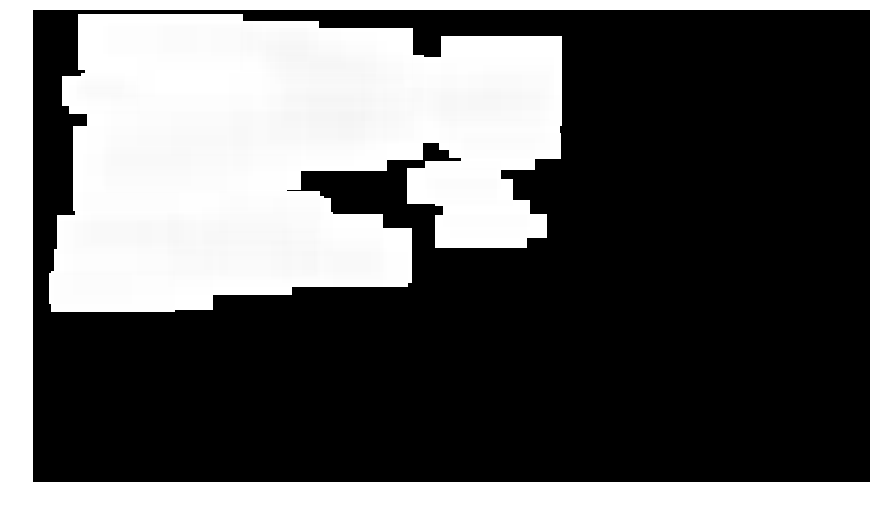

('processing time: ', 0.07328677177429199)


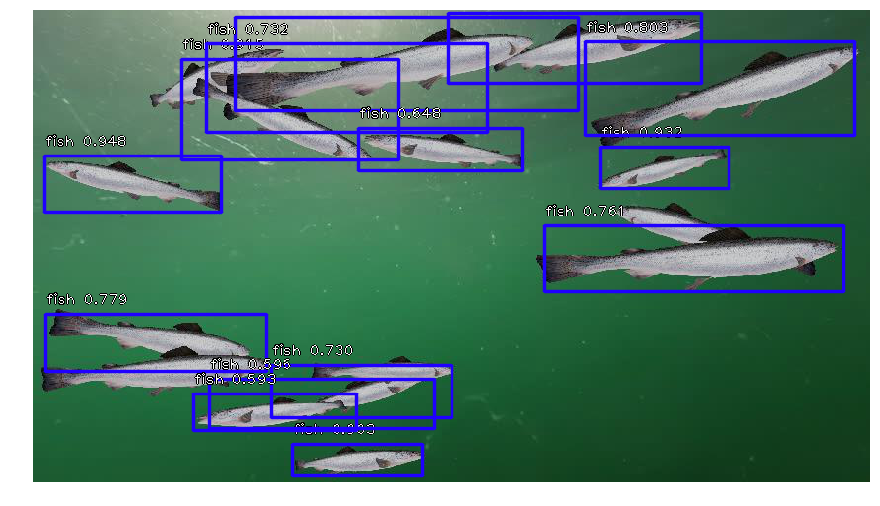

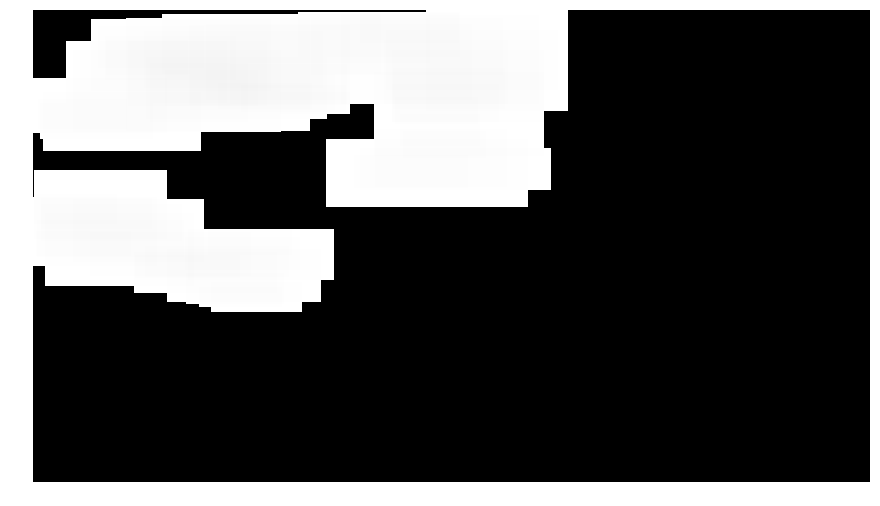

('processing time: ', 0.07673001289367676)


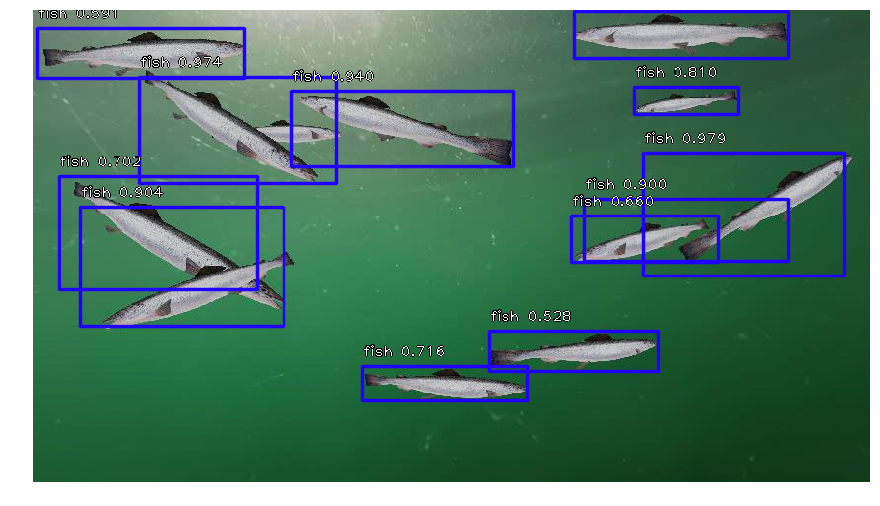

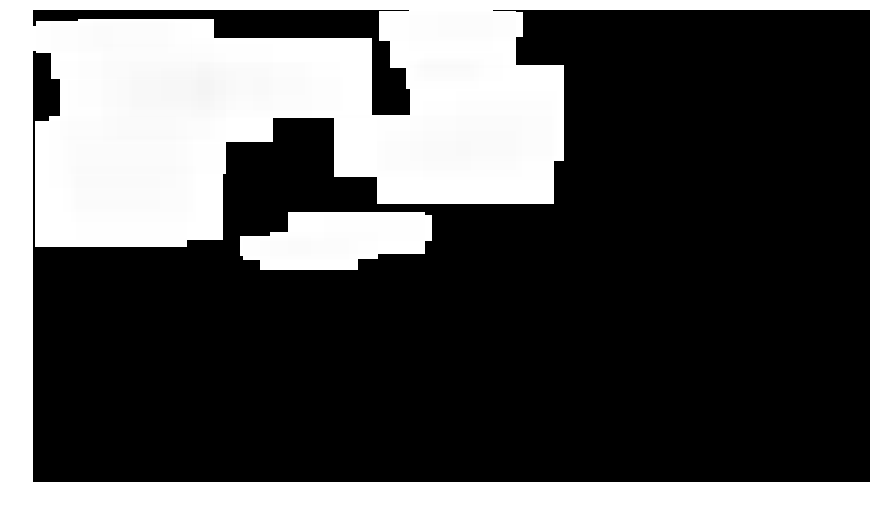

('processing time: ', 0.07385611534118652)


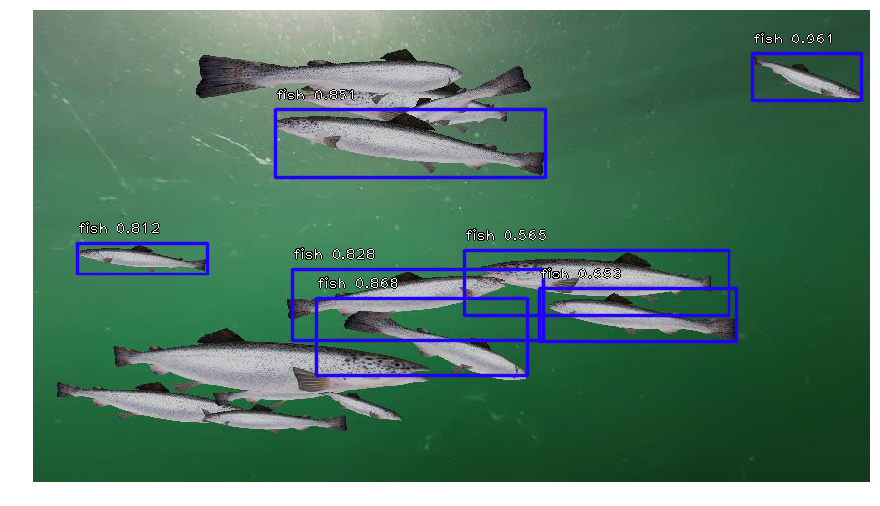

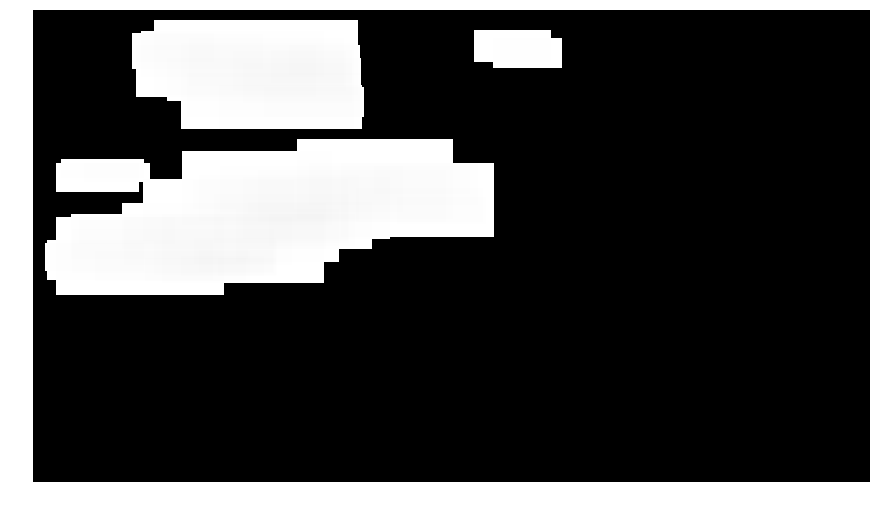

('processing time: ', 0.0745089054107666)


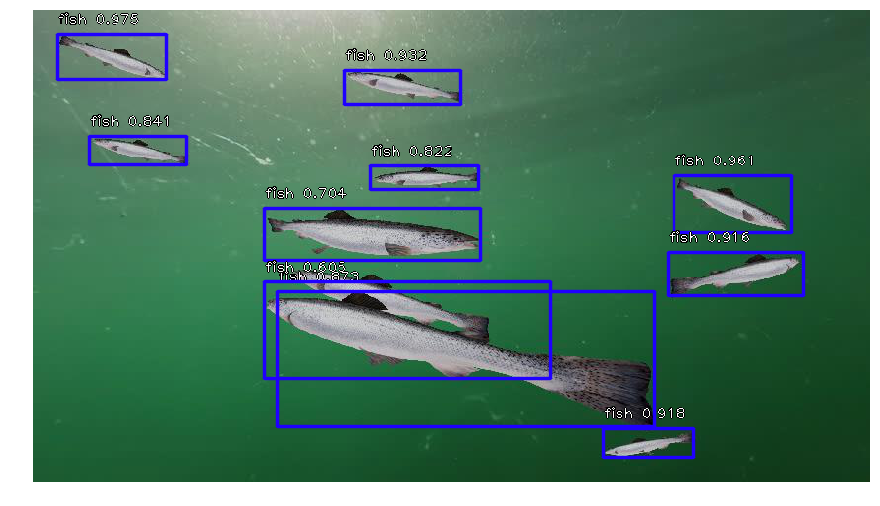

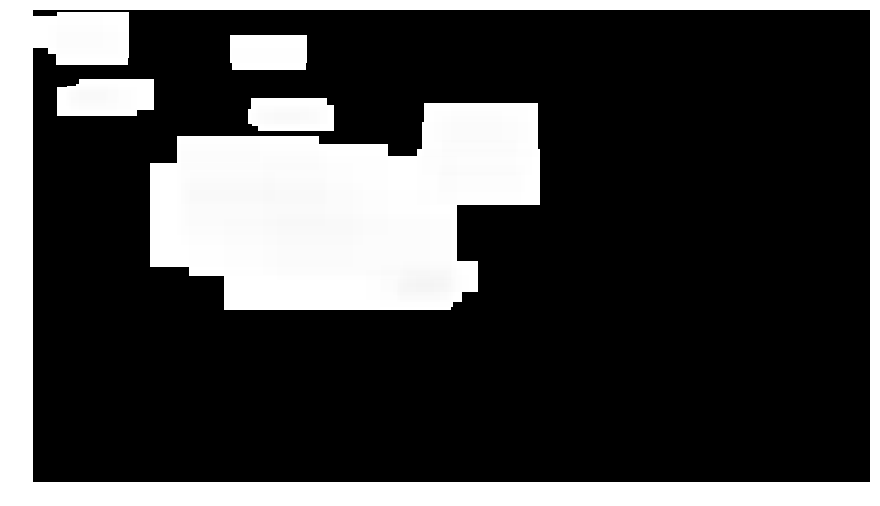

('processing time: ', 0.07948899269104004)


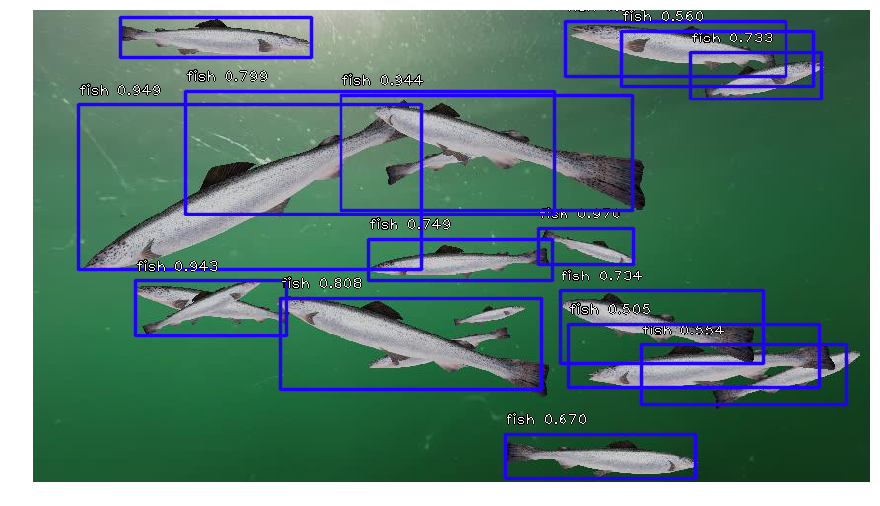

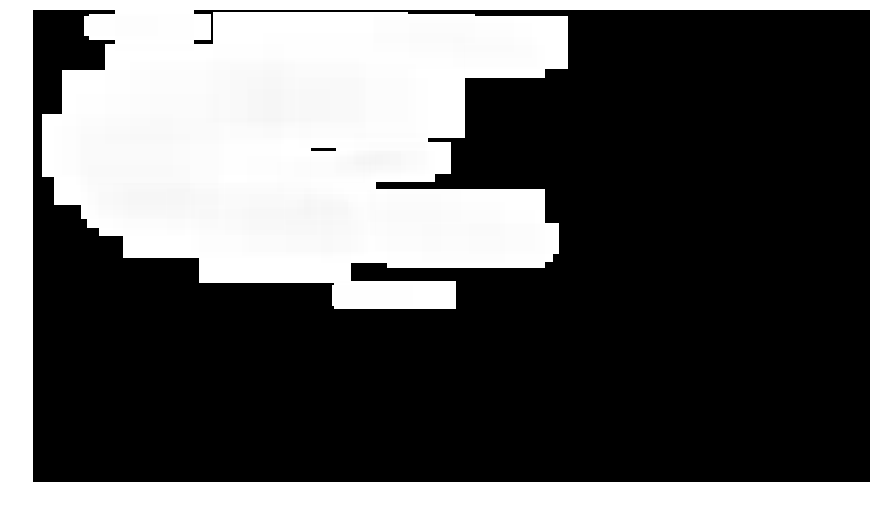

('processing time: ', 0.07568597793579102)


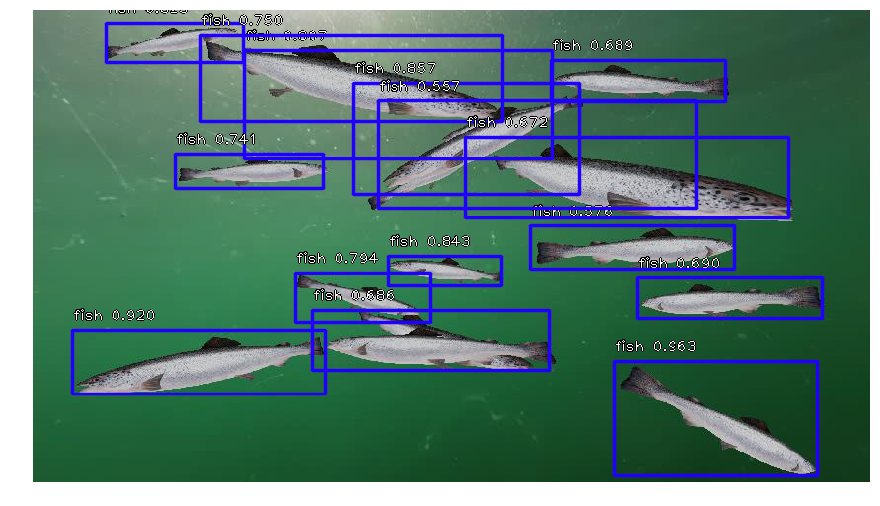

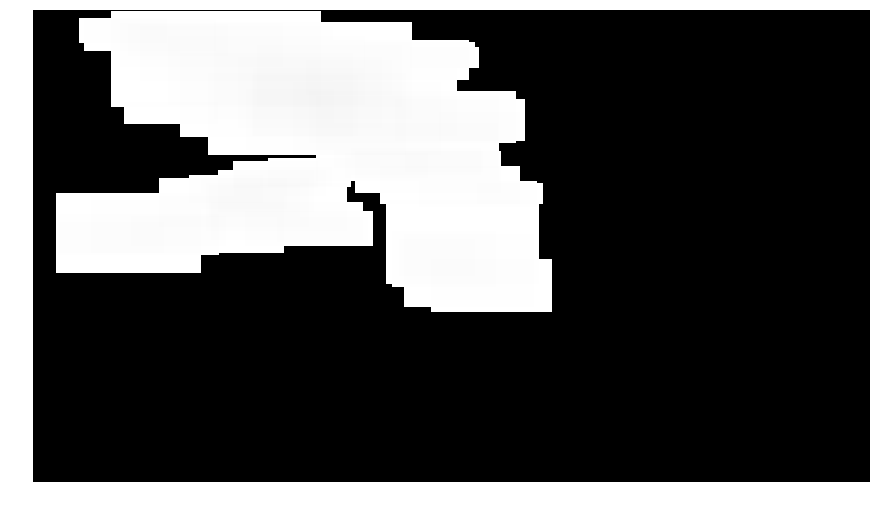

('processing time: ', 0.07427191734313965)


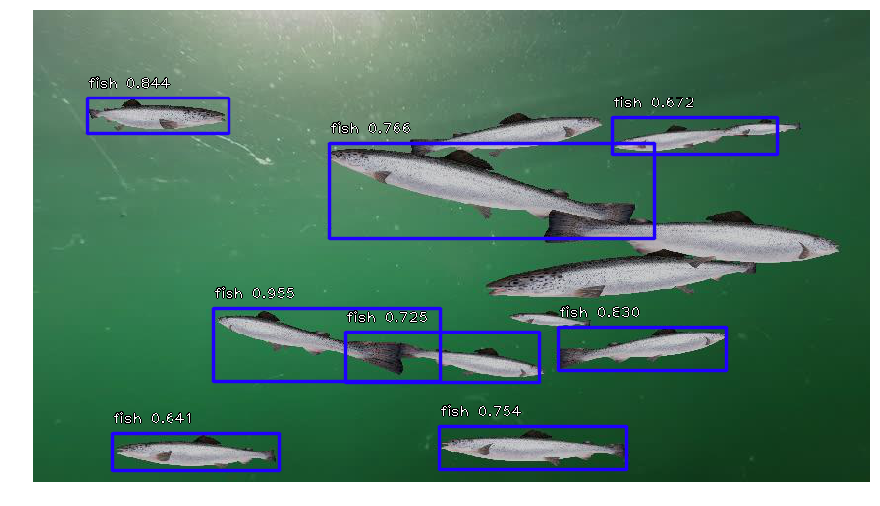

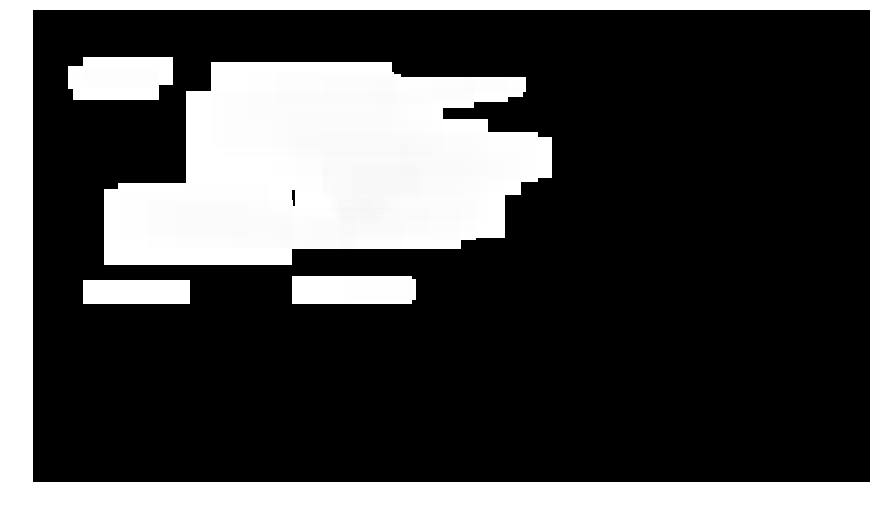

('processing time: ', 0.07911896705627441)


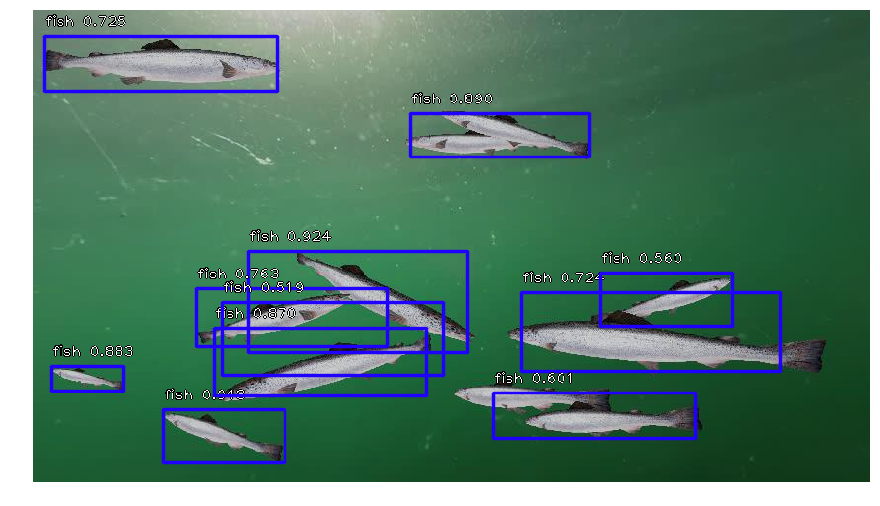

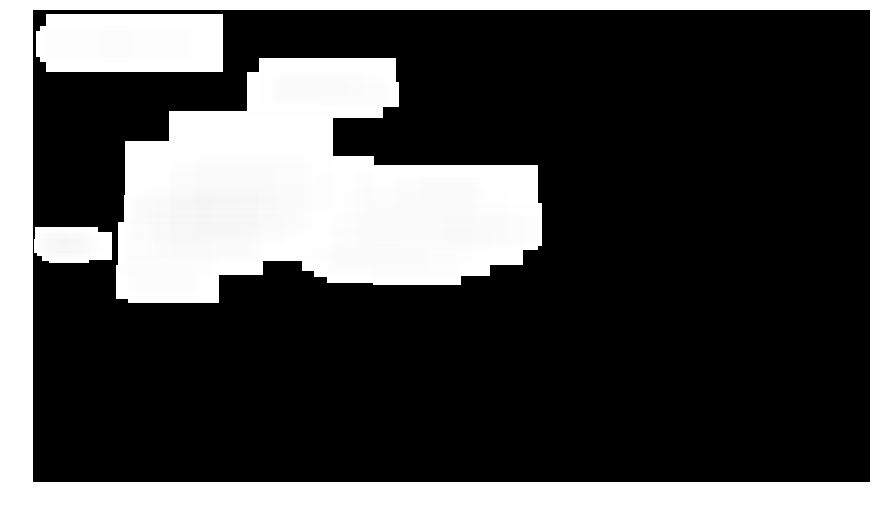

('processing time: ', 0.07408809661865234)


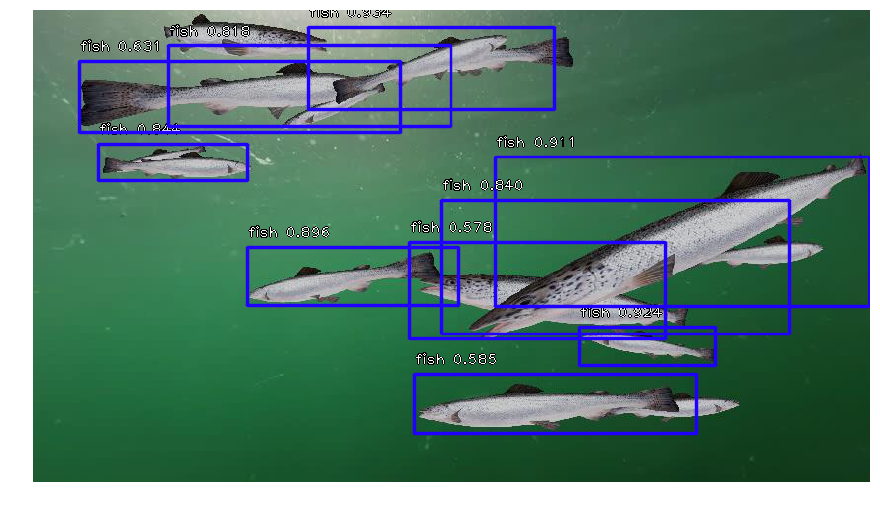

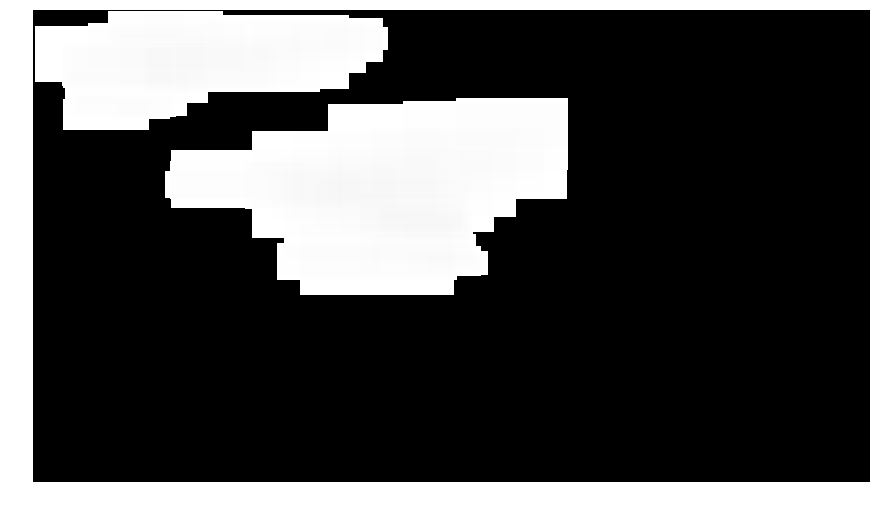

('processing time: ', 0.07689785957336426)


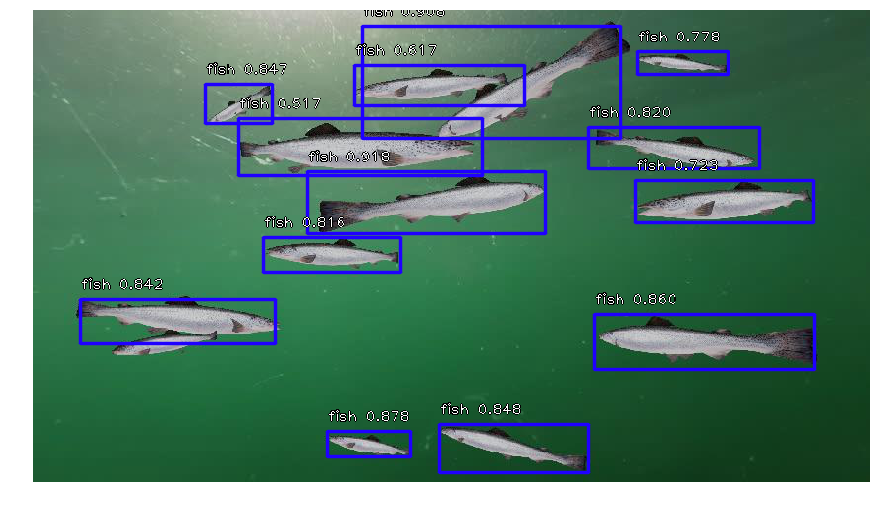

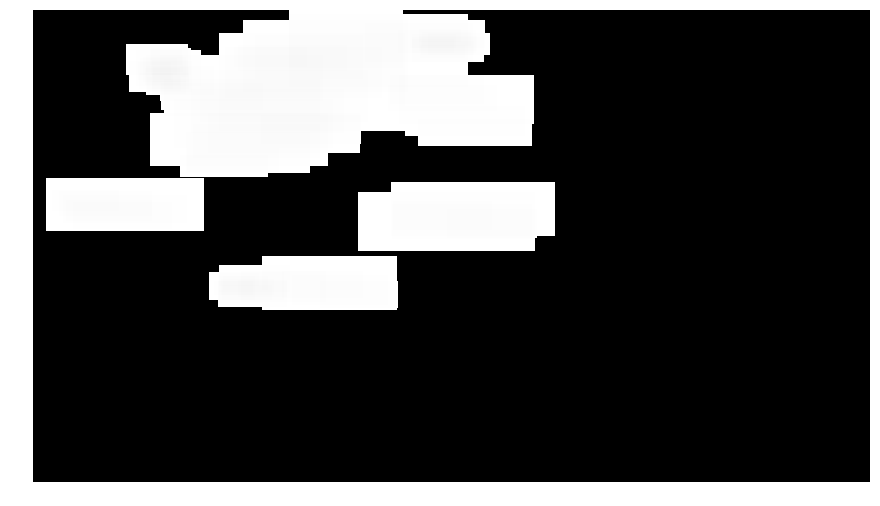

('processing time: ', 0.0744180679321289)


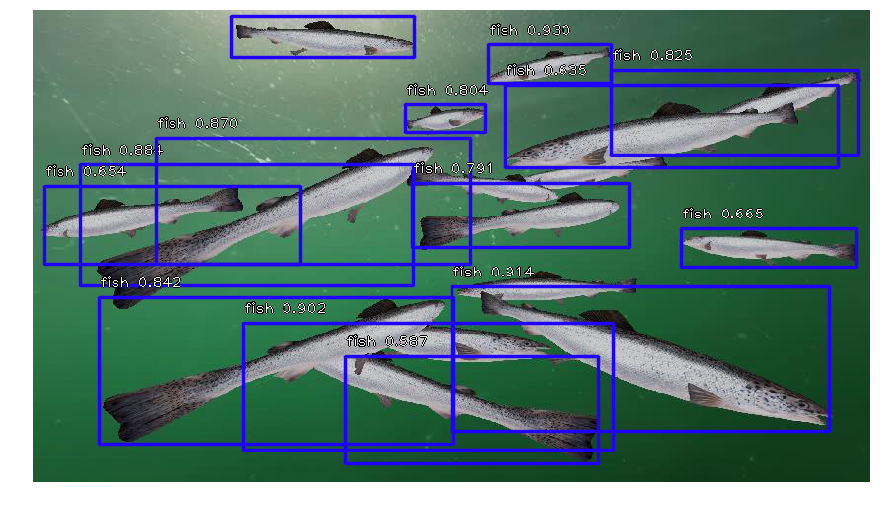

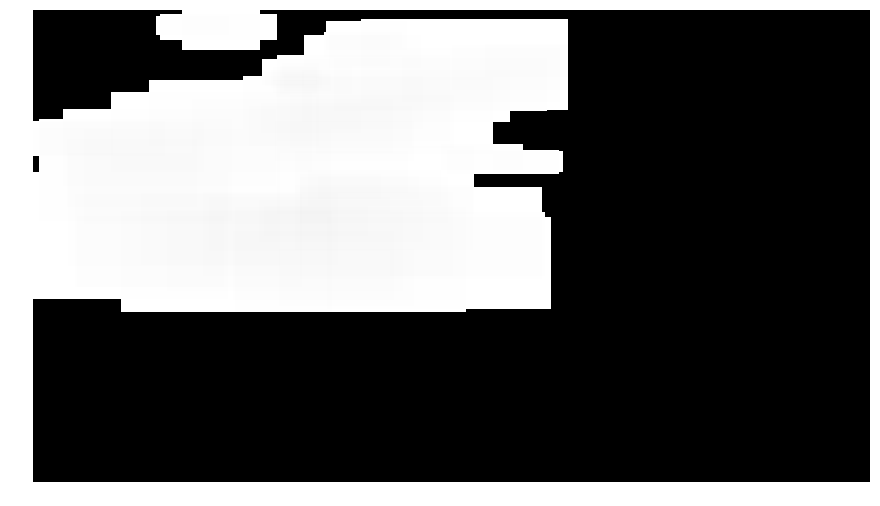

In [43]:
random.shuffle(images)
for i in range(20):
    # load image
    image = read_image_bgr(images[i])

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)

    # correct for image scale
    boxes /= scale
    overlap_matrix = overlap(image, boxes, score)
    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.5:
            break

        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)

    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(draw)
    plt.show()

    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(overlap_matrix)
    plt.show()
    

In [37]:
boxes

array([[[ 2.2775135e+01,  8.9040833e+01,  1.9785661e+02,  1.8463704e+02],
        [ 6.5710181e+02,  3.9476053e+02,  8.3124963e+02,  4.4865405e+02],
        [ 4.3397971e+02,  1.2456490e+02,  7.6353601e+02,  2.4955388e+02],
        ...,
        [-6.3915980e-01, -6.3915980e-01, -6.3915980e-01, -6.3915980e-01],
        [-6.3915980e-01, -6.3915980e-01, -6.3915980e-01, -6.3915980e-01],
        [-6.3915980e-01, -6.3915980e-01, -6.3915980e-01, -6.3915980e-01]]],
      dtype=float32)